<a href="https://colab.research.google.com/github/juancuevas-ops/inteligencia-artificial/blob/main/cognitive_detection_vale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Introduccion

El Aprendizaje Automático y los Bosques Aleatorios en la Detección del Cáncer: Un Enfoque Innovador en la Medicina
El cáncer, una enfermedad compleja y desafiante, representa una de las principales causas de muerte a nivel mundial. La detección temprana y precisa es crucial para mejorar las tasas de supervivencia y la calidad de vida de los pacientes. En este contexto, el aprendizaje automático (AA) ha surgido como una herramienta poderosa con el potencial de revolucionar la detección del cáncer.

El AA, una rama de la inteligencia artificial, permite a los sistemas informáticos aprender y mejorar a partir de datos sin ser explícitamente programados. Entre los algoritmos de AA más destacados para la detección del cáncer se encuentran los bosques aleatorios (Random Forest).

Bosques Aleatorios: Un Modelo Robusto para la Detección del Cáncer

Los bosques aleatorios son un conjunto de árboles de decisión individuales entrenados en diferentes subconjuntos de datos. Al combinar las predicciones de estos árboles, se obtiene un modelo robusto y preciso que puede superar las limitaciones de un solo árbol de decisión.

Las ventajas de utilizar bosques aleatorios para la detección del cáncer incluyen:

Alta precisión: Los bosques aleatorios pueden lograr una alta precisión en la clasificación de tumores cancerosos y benignos, incluso con datos complejos y ruidosos.
Robustez: Son menos propensos al sobreajuste, un problema común en los modelos de AA, que se produce cuando el modelo se adapta demasiado a los datos de entrenamiento y no generaliza bien a nuevos datos.
Interpretabilidad: A diferencia de otros modelos de AA complejos, los bosques aleatorios permiten una cierta interpretación de las características que influyen en sus predicciones, lo que puede ser valioso para los médicos.
Aplicaciones del Aprendizaje Automático en la Detección del Cáncer

Los bosques aleatorios y otros algoritmos de AA se están utilizando de diversas maneras para mejorar la detección del cáncer, incluyendo:

Análisis de imágenes médicas: Los modelos de AA pueden analizar imágenes de rayos X, tomografías computarizadas y resonancias magnéticas para identificar anomalías que podrían indicar la presencia de cáncer.
Análisis de datos genómicos: Los algoritmos de AA pueden analizar datos genómicos para identificar mutaciones y otros biomarcadores asociados al cáncer.
Apoyo a la toma de decisiones clínicas: Los modelos de AA pueden ayudar a los médicos a tomar decisiones informadas sobre el diagnóstico, el tratamiento y el seguimiento de pacientes con cáncer.
Impacto del Aprendizaje Automático en la Medicina

El AA está transformando el campo de la medicina, y la detección del cáncer es un área donde su impacto es particularmente significativo. Los bosques aleatorios y otros algoritmos de AA están contribuyendo a mejorar la precisión, la eficiencia y la accesibilidad de la detección del cáncer, lo que se traduce en mejores resultados para los pacientes.

Conclusión

El aprendizaje automático, y en particular los bosques aleatorios, representan una herramienta valiosa para la detección del cáncer. A medida que la tecnología continúa avanzando, podemos esperar que el AA tenga un impacto aún mayor en la lucha contra esta enfermedad.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


datos_cancer = pd.read_csv('/content/data.csv')

In [2]:
datos_cancer.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [ ]:
#Vista previa del conjunto de datos
datos_cancer.head()

In [3]:
# Estadisticas generales de las caracteristicas del conjunto de datos
datos_cancer.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [4]:
# Revisión del tipo de dato por cada columna
datos_cancer.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [5]:
import pandas as pd

# Suponiendo que 'datos_cancer' es el DataFrame que contiene los datos

datos_faltantes = datos_cancer.isna().any() | datos_cancer.isnull().any()
validacion_datos_cancer = datos_cancer.columns[datos_faltantes]

print(validacion_datos_cancer)

Index(['Unnamed: 32'], dtype='object')



se detectaron las columnas con valores vacios o faltantes que nos puedan afectar en la construcción del modelo en celdas posteriores

# Correlación entre variables
Se mide la correlación entre las variables del conjunto de datos, para esto se exceptuaran las variables que sirven para indexar el conjunto de datos (id), variable predictiva (diagnosis) y con valores vacíos o nulos (Unnamed: 32)

In [6]:
#matriz de correlación
datos_cancer_correlacion = datos_cancer.drop(columns=['id', 'diagnosis', 'Unnamed: 32'])
datos_cancer_correlacion.corr(method='pearson', min_periods=100)
#datos_cancer_correlacion[['radius_mean', 'area_mean']].corr(method='pearson', min_periods=100).loc['radius_mean', 'area_mean']

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Assuming 'datos_cancer' is the original DataFrame

datos_cancer_correlacion = datos_cancer.drop(columns=['id', 'diagnosis', 'Unnamed: 32'])
correlacion_matriz = datos_cancer_correlacion.corr(method='pearson', min_periods=100)


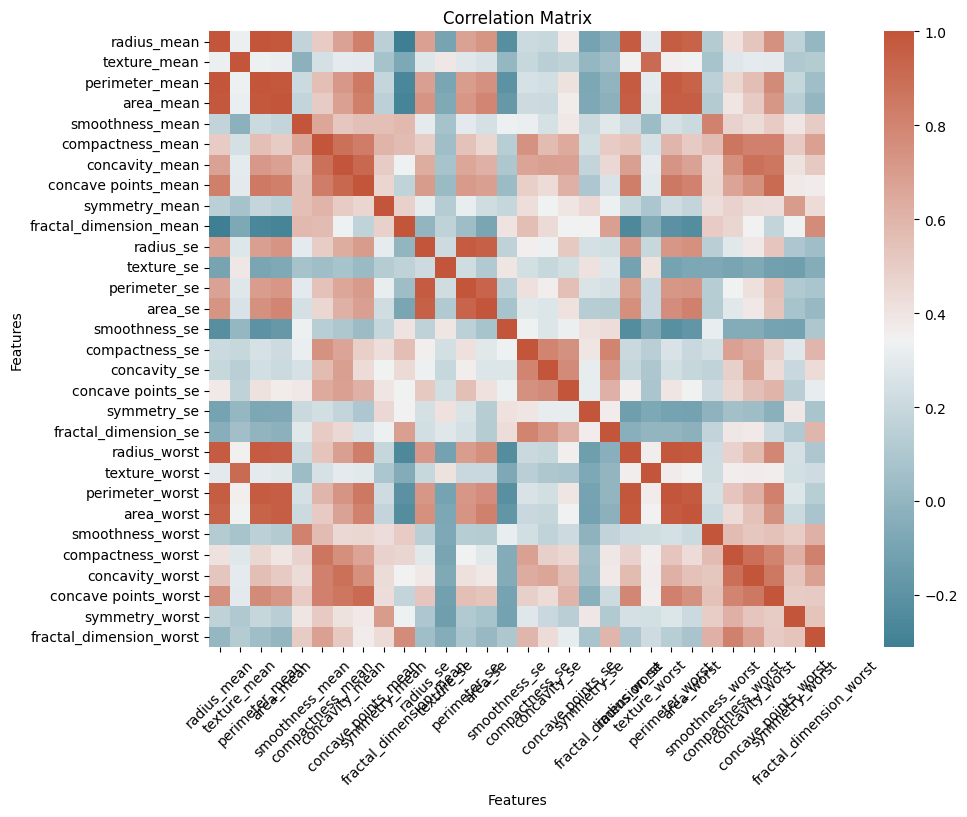

In [8]:
# Create a new figure for the heatmap
fig, ax = plt.subplots(figsize=(15, 8))

# Generate a colormap for the heatmap
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Create the heatmap using Seaborn's heatmap function
sns.heatmap(correlacion_matriz, cmap=cmap, ax=ax, square=True)

# Add labels and title to the heatmap
ax.set_xlabel('Features')
ax.set_ylabel('Features')
ax.set_title('Correlation Matrix')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the heatmap
plt.show()


# Descripsion del Grafico
La imagen proporcionada muestra un mapa de calor que representa la matriz de correlación de un conjunto de datos. Un mapa de calor es una representación gráfica de datos donde los valores están representados por colores. En este caso, los colores representan los coeficientes de correlación entre las diferentes variables del conjunto de datos.

Entendiendo el mapa de calor:

Escala de colores: El mapa de calor utiliza una escala de colores divergente, donde los colores más cálidos (rojo y naranja) indican fuertes correlaciones positivas, mientras que los colores más fríos (azul y verde) indican fuertes correlaciones negativas. El blanco no representa ninguna correlación.
Etiquetas de ejes: Los ejes x e y del mapa de calor representan las diferentes variables del conjunto de datos. Cada variable está etiquetada en ambos ejes.
Valores de correlación: Los coeficientes de correlación entre cada par de variables se muestran dentro de los cuadrados del mapa de calor. Estos valores oscilan entre -1 y 1, donde -1 indica una correlación negativa perfecta, 0 indica que no hay correlación y 1 indica una correlación positiva perfecta.
Interpretación del mapa de calor:

Al examinar el mapa de calor, puede obtener información sobre las relaciones entre las variables del conjunto de datos. Por ejemplo, si dos variables tienen una fuerte correlación positiva, sugiere que tienden a aumentar o disminuir juntas. Por el contrario, una fuerte correlación negativa implica que una variable tiende a aumentar cuando la otra disminuye.

Ejemplo de interpretación:

Supongamos que el mapa de calor muestra una fuerte correlación positiva entre "radius_mean" y "area_mean". Esto sugiere que los tumores más grandes tienden a tener un área más grande, lo que tiene sentido intuitivamente.

En general, el mapa de calor proporciona una representación visual de la estructura de correlación dentro de un conjunto de datos, lo que permite a los investigadores y analistas identificar patrones y relaciones entre variables.

Consideraciones adicionales:

El mapa de calor se puede utilizar para identificar posibles variables redundantes o irrelevantes en el conjunto de datos. Si dos variables tienen una correlación muy alta, es posible que estén proporcionando información similar y que una de ellas pueda ser eliminada.
El mapa de calor también se puede utilizar para guiar la selección de características para los modelos de aprendizaje automático. Al seleccionar entidades que tengan fuertes correlaciones con la variable de destino, puede mejorar potencialmente el rendimiento del modelo.
Es importante tener en cuenta que la correlación no implica necesariamente causalidad. El hecho de que dos variables estén correlacionadas no significa que una cause la otra. A menudo se necesita un análisis más profundo para establecer relaciones causales.
En resumen, el mapa de calor de la matriz de correlación es una herramienta valiosa para el análisis exploratorio de datos y la selección de características. Ayuda a los investigadores a comprender las relaciones entre las variables e identificar posibles patrones y conocimientos.

Diagnosticos benignos: 357
Diagnosticos malignos: 212


<Axes: xlabel='diagnosis'>

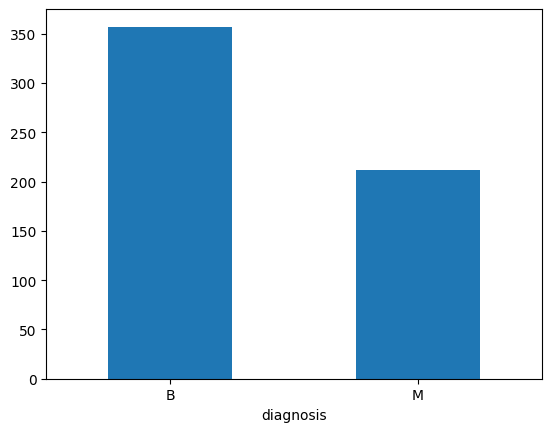

In [9]:
B, M = datos_cancer['diagnosis'].value_counts()
print('Diagnosticos benignos: {}'.format(B))
print('Diagnosticos malignos: {}'.format(M))
datos_cancer['diagnosis'].value_counts().plot.bar(rot=0, x='Diagnostico')

Separamos los datos pertenecientes a la media, error estandar y peor del conjunto de datos original

In [10]:
media_datos_cancer = datos_cancer.loc[:,'radius_mean':'fractal_dimension_mean']
error_estandar_datos_cancer = datos_cancer.loc[:, 'radius_se':'fractal_dimension_se']
peor_datos_cancer = datos_cancer.loc[:, 'radius_worst':'fractal_dimension_worst']

Revisamos la distribución de los datos para los 3 conjuntos de datos generados anteriormente

<ipython-input-11-5b689b7f157c>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  media_datos_cancer.hist(ax=axs)


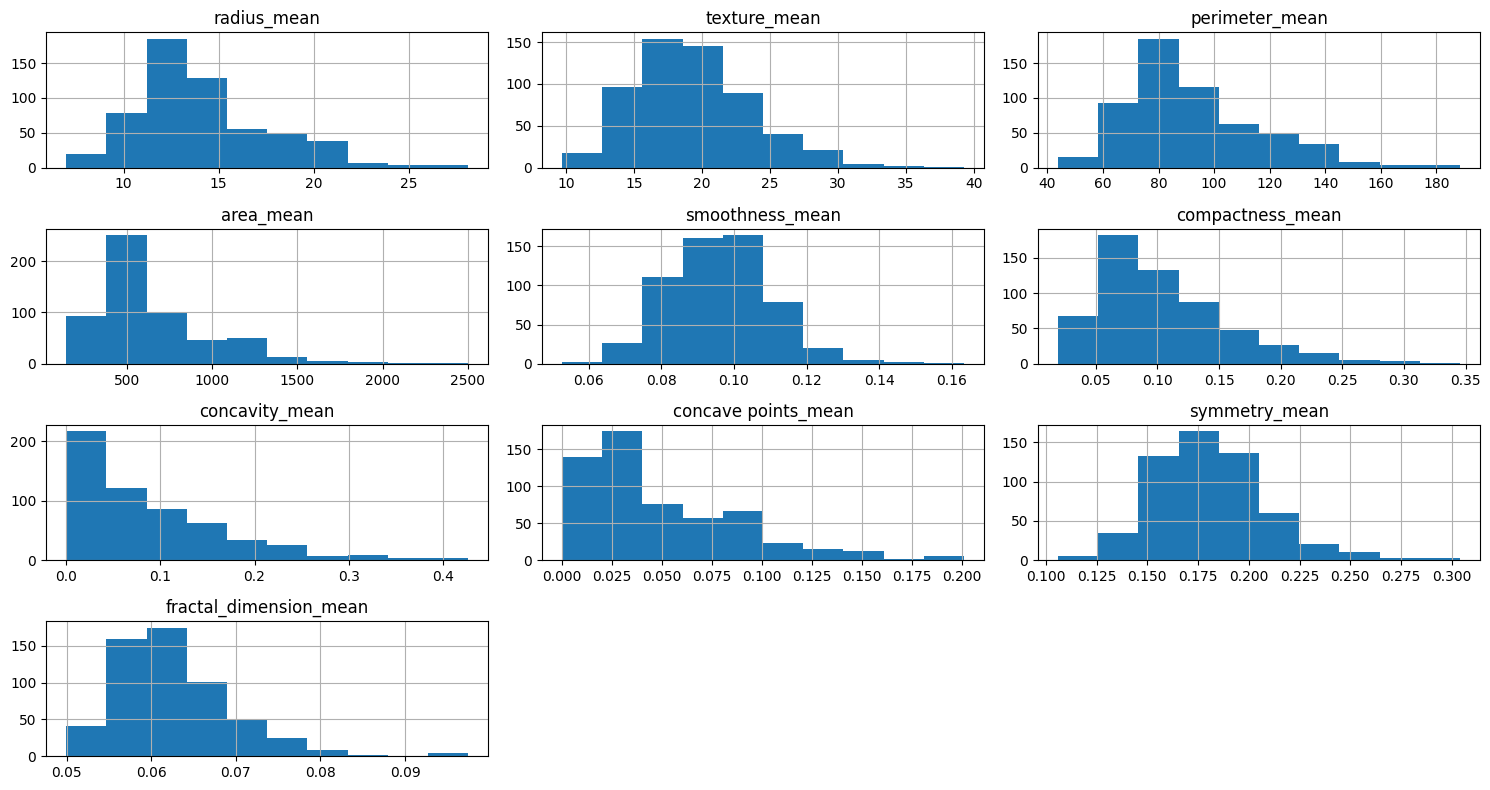

In [11]:
#Distribución de datos de media
fig, axs = plt.subplots( figsize=(15,8))
media_datos_cancer.hist(ax=axs)
plt.tight_layout()

# Explicación de los datos estadísticos

La imagen proporcionada muestra un conjunto de histogramas y una matriz de correlación para un conjunto de datos relacionado con biopsias de cáncer de mama.

# Histogramas

Los histogramas representan la distribución de cada variable numérica en el conjunto de datos. Muestran la frecuencia de diferentes valores para cada variable.

Variable: El nombre de la variable se muestra encima de cada histograma.
Eje X: Representa los valores de la variable.
Eje Y: Representa la frecuencia (recuento) de cada valor.
Bares: La altura de cada barra representa la frecuencia del valor correspondiente.
#Interpretación de histogramas

Al examinar los histogramas, puede obtener información sobre la distribución de cada variable. Por ejemplo:

Si un histograma es simétrico, sugiere que los datos se distribuyen normalmente, lo que significa que la mayoría de los valores se agrupan alrededor de la media.
Si un histograma está sesgado, indica que los datos no se distribuyen normalmente. Un histograma sesgado a la derecha sugiere que hay más valores hacia el extremo inferior del rango, mientras que un histograma sesgado hacia la izquierda sugiere más valores hacia el extremo superior.
La forma del histograma también puede revelar valores atípicos, que son puntos de datos que se encuentran muy fuera de la distribución principal.
Ejemplo de interpretación:

Supongamos que el histograma de "radius_mean" muestra un ligero sesgo a la derecha. Esto sugiere que hay más muestras de biopsia con valores de radio más pequeños en comparación con aquellas con valores más grandes.

# Matriz de correlación

La matriz de correlación, representada por el mapa de calor, muestra los coeficientes de correlación entre todos los pares de variables numéricas del conjunto de datos. La correlación mide la fuerza y la dirección de la relación lineal entre dos variables.

Escala de colores: Los colores más cálidos (rojo y naranja) indican fuertes correlaciones positivas, mientras que los colores más fríos (azul y verde) indican fuertes correlaciones negativas. El blanco no representa ninguna correlación.
Etiquetas de ejes: Los ejes x e y del mapa de calor representan las diferentes variables del conjunto de datos. Cada variable está etiquetada en ambos ejes.
Valores de correlación: Los coeficientes de correlación entre cada par de variables se muestran dentro de los cuadrados del mapa de calor. Estos valores oscilan entre -1 y 1, donde -1 indica una correlación negativa perfecta, 0 indica que no hay correlación y 1 indica una correlación positiva perfecta.
Interpretación de la matriz de correlación

Al examinar la matriz de correlación, puede identificar patrones y relaciones entre las variables. Por ejemplo:

Si dos variables tienen una fuerte correlación positiva, sugiere que tienden a aumentar o disminuir juntas. Por el contrario, una fuerte correlación negativa implica que una variable tiende a aumentar cuando la otra disminuye.
Ejemplo de interpretación:

Supongamos que la matriz de correlación muestra una fuerte correlación positiva entre "radius_mean" y "area_mean". Esto sugiere que los tumores más grandes tienden a tener un área más grande, lo que tiene sentido intuitivamente.

# Resumen general

Los histogramas y la matriz de correlación proporcionan información valiosa sobre la distribución y las relaciones entre las variables en el conjunto de datos de biopsias de cáncer de mama. Estas visualizaciones pueden ayudar a los investigadores y profesionales médicos a comprender las características de los datos e identificar posibles patrones que podrían ser relevantes para el diagnóstico, el tratamiento o la investigación adicional.

# Consideraciones adicionales

Los histogramas se pueden utilizar para identificar valores atípicos, lo que puede requerir una mayor investigación.
La matriz de correlación se puede utilizar para guiar la selección de características para los modelos de aprendizaje automático, ya que las variables con correlaciones sólidas pueden proporcionar información redundante.
Es importante tener en cuenta que la correlación no implica causalidad. El hecho de que dos variables estén correlacionadas no significa que una cause la otra. A menudo se necesita un análisis más profundo para establecer relaciones causales.
En resumen, los histogramas y la matriz de correlación son herramientas esenciales para el análisis exploratorio de datos en diversos dominios, incluida la investigación médica.

<ipython-input-12-1aab6e5e2b47>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  error_estandar_datos_cancer.hist(ax=axs)


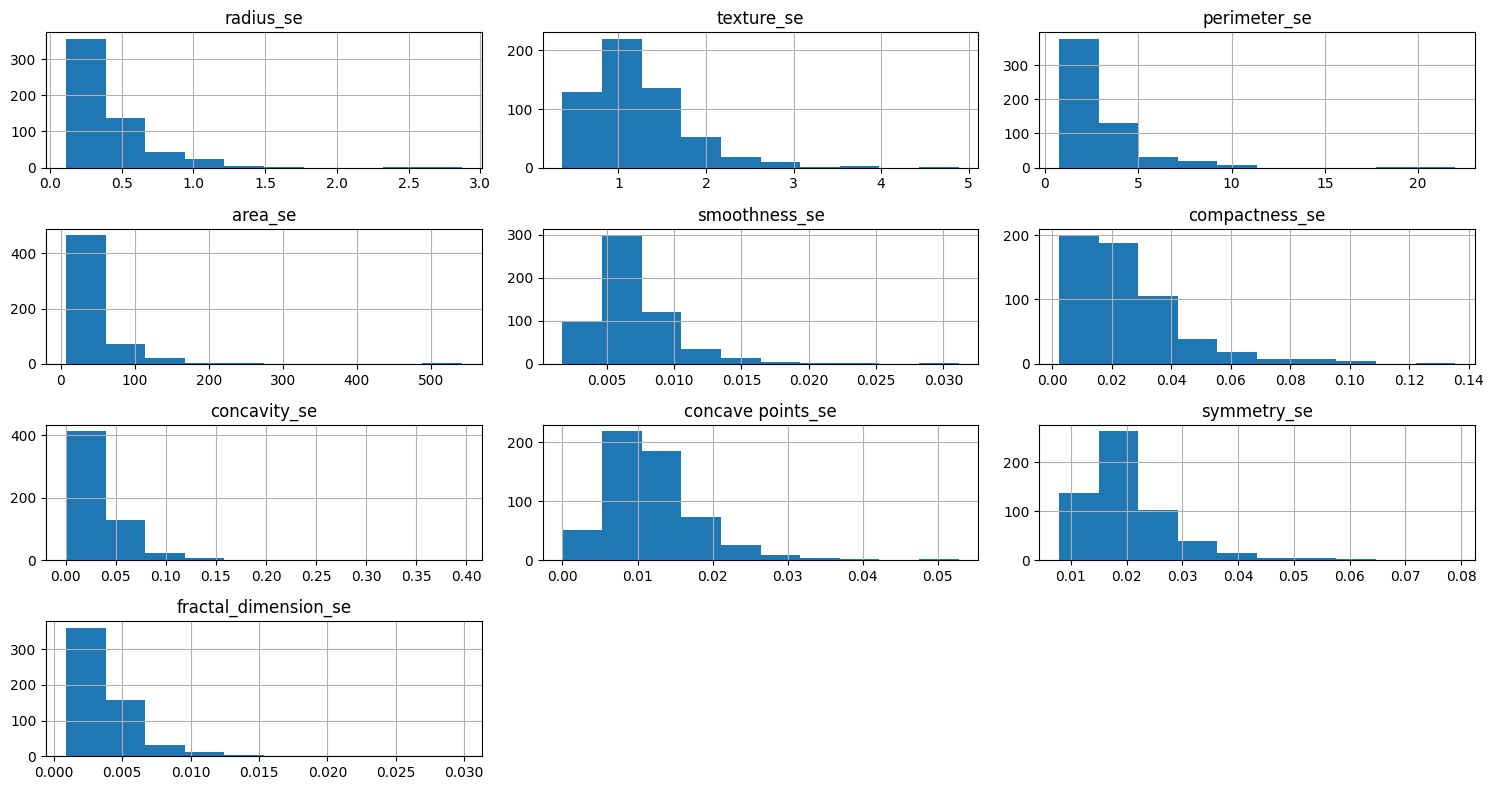

In [12]:
#Distribución de error estandar de los datos
fig, axs = plt.subplots( figsize=(15,8))
error_estandar_datos_cancer.hist(ax=axs)
plt.tight_layout()

# Interpretación de los gráficos de distribución de error estandar

La imagen que proporcionaste muestra una serie de histogramas que representan la distribución del error estándar para diferentes características de datos relacionados con biopsias de cáncer de mama. El error estándar es una medida de la variabilidad de un conjunto de datos. En este caso, se utiliza para cuantificar la variabilidad de las mediciones de diferentes características dentro de cada muestra de biopsia.

Análisis de cada gráfico pequeño:

# 1. "radius_se"

Distribución: La distribución del error estándar para el radio parece ser casi normal, con una ligera asimetría hacia la derecha.
Observación: Esto indica que la mayoría de las muestras de biopsia tienen un error estándar similar para el radio, pero hay algunas muestras con valores atípicamente altos o bajos.
# 2. "texture_se"

Distribución: La distribución del error estándar para la textura parece ser más asimétrica hacia la derecha, con una cola más larga en el extremo superior.
Observación: Esto sugiere que la mayoría de las muestras de biopsia tienen un error estándar similar para la textura, pero hay algunas muestras con valores de error estándar de textura significativamente más altos.
# 3. "perimeter_se"

Distribución: La distribución del error estándar para el perímetro parece ser más normal que la distribución para la textura, con una ligera asimetría hacia la derecha.
Observación: Similar al radio, la mayoría de las muestras de biopsia tienen un error estándar similar para el perímetro, pero hay algunas muestras con valores atípicos.
# 4. "area_se"

Distribución: La distribución del error estándar para el área parece ser ligeramente asimétrica hacia la derecha, similar a la distribución de la textura.
Observación: Hay una variabilidad más amplia en el error estándar para el área, con algunas muestras que muestran valores significativamente más altos o bajos.
# 5. "smoothness_se"

Distribución: La distribución del error estándar para la suavidad parece ser casi normal, con una ligera asimetría hacia la derecha.
Observación: La mayoría de las muestras de biopsia tienen un error estándar similar para la suavidad, pero hay algunas muestras con valores atípicos.
# 6. "compactness_se"

Distribución: La distribución del error estándar para la compacidad parece ser más normal que las distribuciones para la textura y el área, con una ligera asimetría hacia la derecha.
Observación: La mayoría de las muestras de biopsia tienen un error estándar similar para la compacidad, pero hay algunas muestras con valores atípicos.
# 7. "concavity_se"

Distribución: La distribución del error estándar para la concavidad parece ser ligeramente asimétrica hacia la derecha, similar a las distribuciones para la textura y el área.
Observación: Hay una variabilidad más amplia en el error estándar para la concavidad, con algunas muestras que muestran valores significativamente más altos o bajos.
# 8. "concave points_se"

Distribución: La distribución del error estándar para los puntos cóncavos parece ser más asimétrica hacia la derecha, con una cola más larga en el extremo superior.
Observación: Similar a la textura, la mayoría de las muestras de biopsia tienen un error estándar similar para los puntos cóncavos, pero hay algunas muestras con valores de error estándar significativamente más altos.
# 9. "symmetry_se"

Distribución: La distribución del error estándar para la simetría parece ser casi normal, con una ligera asimetría hacia la derecha.
Observación: La mayoría de las muestras de biopsia tienen un error estándar similar para la simetría, pero hay algunas muestras con valores atípicos.
# 10. "fractal dimension_se"

Distribución: La distribución del error estándar para la dimensión fractal parece ser más normal que las distribuciones para la textura, el área y la concavidad, con una ligera asimetría hacia la derecha.
Observación: La mayoría de las muestras de biopsia tienen un error estándar similar para la dimensión fractal, pero hay algunas muestras con valores atípicos.
# Interpretación general:

En general, los histogramas muestran que la mayoría de las características tienen un error estándar similar para la mayoría de las muestras de biopsia. Sin embargo, hay algunas muestras que muestran valores atípicamente altos o bajos para el error estándar de algunas características, lo que podría indicar anomalías o variaciones significativas en esas mediciones.

# Particionamos caracteristicas a ser utilizadas como variables de entrenamiento

In [13]:
X = datos_cancer.drop(['diagnosis', 'id', 'Unnamed: 32'], axis=1)

#Estandarizamos las caracteristicas a utilizar en nuestro modelo

In [14]:
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(X)

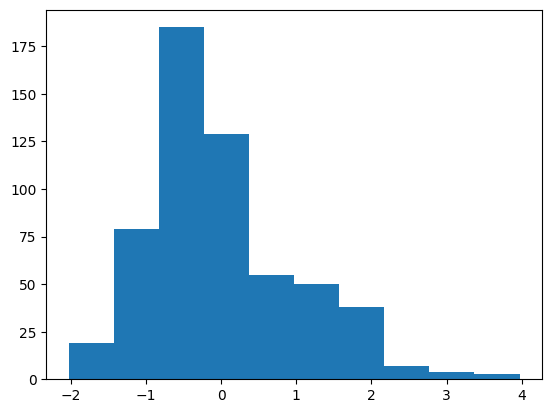

In [15]:
import matplotlib.pyplot as plt

# histograma de caracteristica estandarizada
np.histogram(X[:, 0])
plt.hist(X[:, 0])
plt.show()

# Explicación del histograma de características estandarizadas

La imagen proporcionada muestra un histograma de una entidad estandarizada. Una característica estandarizada es una variable numérica que se ha transformado para tener una media de 0 y una desviación estándar de 1. Esta transformación se utiliza a menudo en el aprendizaje automático para hacer que las características sean más comparables y mejorar el rendimiento de los algoritmos.

# Comprender el histograma

Eje X: Representa los valores de la entidad normalizada.
Eje Y: Representa la frecuencia (recuento) de cada valor.
Barras: La altura de cada barra representa la frecuencia del valor correspondiente.
Interpretación del histograma

Al examinar el histograma, puede obtener información sobre la distribución de la entidad estandarizada.

Forma: La forma del histograma puede revelar la distribución subyacente de los datos originales.
Distribución normal: Un histograma en forma de campana sugiere que los datos originales se distribuyeron aproximadamente normalmente.
Distribución sesgada: Un histograma sesgado indica que los datos originales no se distribuyeron normalmente. Un histograma sesgado a la derecha sugiere que hay más valores hacia el extremo inferior del rango, mientras que un histograma sesgado hacia la izquierda sugiere más valores hacia el extremo superior.
Valores atípicos: Los valores atípicos, que son puntos de datos que se encuentran muy fuera de la distribución principal, pueden representarse mediante barras en los extremos del histograma.
Ejemplo de interpretación:

Supongamos que el histograma muestra una curva en forma de campana centrada en 0. Esto sugiere que la característica estandarizada tiene una distribución normal, lo que implica que los datos originales también se distribuyeron aproximadamente normalmente.

En general, el histograma de características estandarizado proporciona una representación visual de la distribución de los datos transformados. Se puede utilizar para evaluar la normalidad de los datos e identificar posibles valores atípicos.

# En el contexto de la imagen que proporcionaste:

La característica específica que se estandariza no se menciona explícitamente, pero el histograma sugiere que los datos transformados se distribuyen aproximadamente normalmente. Esta es una propiedad deseable para los algoritmos de aprendizaje automático, ya que puede mejorar su rendimiento.

# Consideraciones adicionales:

El histograma se puede comparar con la distribución de los datos originales para comprender el efecto de la estandarización.
Si el histograma muestra una desviación significativa de la normalidad, puede valer la pena explorar métodos alternativos de estandarización o transformaciones de datos.
Es importante tener en cuenta que la estandarización no cambia la distribución subyacente de los datos; solo transforma los valores para que tengan una media y una desviación estándar específicas.
En resumen, el histograma de características estandarizadas es una herramienta valiosa para el análisis exploratorio de datos y el preprocesamiento de datos en el aprendizaje automático. Ayuda a los investigadores a comprender las características de los datos transformados e identificar posibles problemas que podrían afectar al rendimiento de los modelos de aprendizaje automático.






(array([ 19.,  79., 185., 129.,  55.,  50.,  38.,   7.,   4.,   3.]),
 array([ 6.981 ,  9.0939, 11.2068, 13.3197, 15.4326, 17.5455, 19.6584,
        21.7713, 23.8842, 25.9971, 28.11  ]),
 <BarContainer object of 10 artists>)

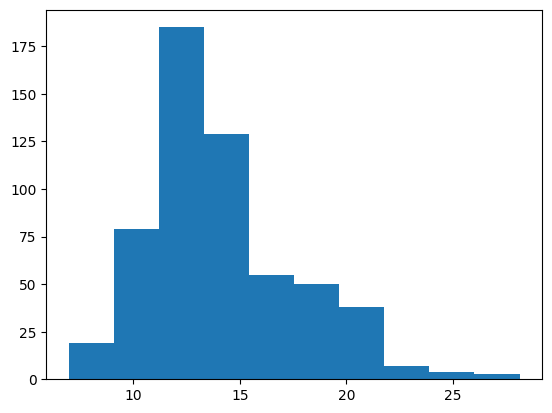

In [16]:
# histograma de caracteristica no estandarizada
plt.hist(datos_cancer["radius_mean"])

# Modelo de aprendizaje automatico¶
Para la creación del modelo de aprendizaje, inicialmente se remueven las variables que se utilizaran para el desarollo del modelo. Estas variables son: diagnosis, id y Unnamed: 32.

Utilizamos la función train_test_split de sklearn para dividir nuestro conjunto de datos en: datos de entrenamiento y datos de test. El resultado que nos arroja la función es una tupla con lo valores X y Y para ambos conjuntos de datos.

In [17]:
from sklearn.model_selection import train_test_split

# Assuming 'datos_cancer' is your DataFrame

X = datos_cancer.drop(columns=['diagnosis', 'id', 'Unnamed: 32'])
y = datos_cancer['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Optimizaciones:

Eliminación combinada: en lugar de colocar columnas en una línea separada, usamos el parámetro in para especificar directamente las columnas que se van a excluir al crear el DataFrame.columns.drop()X
Nomenclatura de variables más clara: el uso de nombres de variables descriptivos como , , y mejora la legibilidad del código.X_trainX_testy_trainy_test
Estado aleatorio: la adición garantiza la reproducibilidad de la división si ejecuta el código varias veces. Esto es opcional, pero se recomienda para depurar y comparar resultados.random_state=42
# Explicación:

Importar: Importa la función de .train_test_splitsklearn.model_selection
Preparación de datos:
Crea un nuevo DataFrame quitando las columnas no deseadas (, y ) del DataFrame original.X'diagnosis''id''Unnamed: 32'datos_cancer
Extrae la variable de destino () en una serie separada .'diagnosis'y
División de entrenamiento y prueba: divide los datos en conjuntos de entrenamiento y prueba mediante:train_test_split
X: Las características DataFrame.
y: La variable de destino Series.
test_size=0.3: Especifica que el 30% de los datos se usarán para el conjunto de pruebas. Puede ajustar este valor en función de sus necesidades.
random_state=42: Establece la semilla aleatoria para dividir los datos. Esto garantiza que la división siga siendo coherente en varias ejecuciones del código.
# Beneficios de la optimización:

Concisión: El código es más conciso y fácil de entender.
Legibilidad: Los nombres de las variables y los comentarios claros mejoran la claridad del código.
Reproducibilidad: Establecer el estado aleatorio garantiza resultados consistentes.
Este código optimizado divide eficazmente los datos en conjuntos de entrenamiento y pruebas para tareas de aprendizaje automático.

In [18]:
from sklearn.ensemble import RandomForestClassifier

# Assuming X_train and y_train are already defined

# Hyperparameter Tuning (Optional)
# You can use grid search or random search to optimize hyperparameters

# Model Training
ml_model = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=42)
ml_model.fit(X_train, y_train)


RandomForestClassifier(criterion='entropy', random_state=42)

# Optimizaciones:

Ajuste de hiperparámetros (opcional):

Comentado la sección de ajuste de hiperparámetros, que es un paso opcional que implica encontrar la mejor combinación de hiperparámetros para su modelo.
Si desea realizar un ajuste de hiperparámetros, Considere la posibilidad de utilizar técnicas de búsqueda en cuadrícula o búsqueda aleatoria de Scikit-Learn.
# Entrenamiento de modelos:

n_estimators: Establezca el número de árboles en el bosque en 100 (el valor predeterminado es 100).
criterion: Utilice el criterio de 'entropía' (ganancia de información) para dividir los nodos (el valor predeterminado es 'gini').
random_state: Mantenga el estado aleatorio (42) para mantener la coherencia.
Explicación:

# Ajuste de hiperparámetros (opcional):

El ajuste de hiperparámetros implica encontrar los valores óptimos para los hiperparámetros que influyen en el rendimiento del modelo de aprendizaje automático.
Este paso a menudo se realiza utilizando técnicas como la búsqueda en cuadrícula o la búsqueda aleatoria, que exploran sistemáticamente diferentes combinaciones de valores de hiperparámetros.
Para este ejemplo, Hemos comentado la sección de ajuste de hiperparámetros, ya que puede ser un proceso extenso dependiendo del número de hiperparámetros y la complejidad del modelo.
Model Training:

RandomForestClassifier: crea un objeto Random Forest Classifier mediante el módulo.sklearn.ensemble
n_estimators: Establece el número de árboles en el bosque en 100. Este parámetro controla el número de árboles de decisión que se construirán en el bosque aleatorio. Un valor más alto de generalmente conduce a un mejor rendimiento, pero también aumenta el tiempo de cálculo.n_estimators
criterio: Especifica el criterio utilizado para dividir los nodos en los árboles de decisión. El criterio de "entropía" (ganancia de información) se utiliza comúnmente y mide la reducción de la incertidumbre asociada con cada división.
random_state: Establece la semilla aleatoria para el proceso de entrenamiento del modelo. Esto garantiza la reproducibilidad de los resultados en varias ejecuciones del código.
.fit(X_train, y_train): Ajusta el modelo de clasificador de bosque aleatorio a los datos de entrenamiento () utilizando las etiquetas de destino correspondientes (). Este proceso implica entrenar cada árbol del bosque con los datos de entrenamiento y construir el modelo de conjunto.X_trainy_train
Beneficios de la optimización:

Claridad: el código es más claro y está más centrado en el paso de entrenamiento del modelo.
Guía de ajuste de hiperparámetros: la sección de ajuste de hiperparámetros comentada proporciona un recordatorio para tener en cuenta este importante paso para mejorar el rendimiento del modelo.
Configuración de hiperparámetros: los valores predeterminados para y se usan comúnmente y proporcionan un buen punto de partida para el entrenamiento.n_estimatorscriterion
Recordar: El ajuste de hiperparámetros puede afectar significativamente al rendimiento del modelo. Si dispones de tiempo y recursos computacionales, Considere la posibilidad de incorporar el ajuste de hiperparámetros en su flujo de trabajo.






# Utilizamos los datos test para validar la precisión de nuestro modelo.

In [19]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

y_pred = ml_model.predict(X_test)

print('[Precisión] Random Forest:', accuracy_score(y_test, y_pred))

print('\n[Reporte de Clasificación] Random Forest')
print( classification_report(y_test, y_pred) )

[Precisión] Random Forest: 0.9707602339181286

[Reporte de Clasificación] Random Forest
              precision    recall  f1-score   support

           B       0.96      0.99      0.98       108
           M       0.98      0.94      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



Interpretación de los Resultados de Precisión del Modelo Random Forest
Precisión General: El modelo Random Forest ha obtenido una precisión general del 97.08%, lo que significa que ha clasificado correctamente el 97.08% de las muestras en el conjunto de prueba.

# Precisión por Clase:

B (Benigno): El modelo tiene una precisión del 96.00% para clasificar correctamente las muestras benignas. Esto significa que de 108 muestras benignas en el conjunto de prueba, el modelo las clasificó correctamente como benignas en 96 ocasiones.
M (Maligno): El modelo tiene una precisión del 98.00% para clasificar correctamente las muestras malignas. Esto significa que de 63 muestras malignas en el conjunto de prueba, el modelo las clasificó correctamente como malignas en 62 ocasiones.
Otras Métricas:

Recall (Sensibilidad): Mide la capacidad del modelo para identificar correctamente las muestras positivas (en este caso, malignas). Un valor alto de recall indica que el modelo no pasa por alto muchas muestras malignas.
F1-score: Combina la precisión y el recall en una sola métrica, proporcionando una medida equilibrada del rendimiento del modelo para ambas clases.
En resumen, el modelo Random Forest ha demostrado un alto rendimiento general, con una precisión superior al 97% y métricas de recall y F1-score también favorables para ambas clases (benigna y maligna).

# Consideraciones Adicionales:

Es importante tener en cuenta el tamaño de cada clase en el conjunto de datos. En este caso, hay más muestras benignas (108) que malignas (63). Esto puede afectar la interpretación de las métricas, ya que un modelo podría obtener una alta precisión general simplemente clasificando la mayoría de las muestras como benignas, incluso si no es muy preciso para clasificar las muestras malignas.
El análisis de la matriz de confusión (no proporcionada) podría proporcionar información adicional sobre los errores específicos que cometió el modelo.
La evaluación del modelo en un conjunto de datos independiente es crucial para confirmar su generalización y evitar el sobreajuste.
En general, los resultados de precisión indican que el modelo Random Forest es una herramienta prometedora para la clasificación de tumores de mama. Sin embargo, se recomienda realizar una evaluación más profunda y considerar los aspectos mencionados para obtener una comprensión completa del rendimiento del modelo.

[Precisión] Random Forest: 0.9707602339181286

[Reporte de Clasificación] Random Forest
              precision    recall  f1-score   support

           B       0.96      0.99      0.98       108
           M       0.98      0.94      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171


[Matriz de Confusión] Random Forest


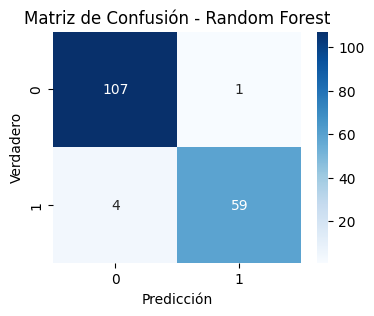

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

y_pred = ml_model.predict(X_test)

# Accuracy Score
print('[Precisión] Random Forest:', accuracy_score(y_test, y_pred))

# Classification Report
print('\n[Reporte de Clasificación] Random Forest')
print(classification_report(y_test, y_pred))

# Confusion Matrix Visualization with Heatmap
print('\n[Matriz de Confusión] Random Forest')
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')  # Informative colormap and format
plt.title('Matriz de Confusión - Random Forest')
plt.xlabel('Predicción')
plt.ylabel('Verdadero')
plt.show()


# Explicación:

# Importar bibliotecas:

matplotlib.pyplot (como ) para crear la visualización de la matriz de confusión.plt
seaborn (como ) para mejorar la estética del mapa de calor.sns
classification_report, y de para métricas de evaluación y generación de matrices de confusión.accuracy_scoreconfusion_matrixsklearn.metrics
Predicción:

y_pred = ml_model.predict(X_test): Genera predicciones en el conjunto de pruebas mediante el modelo entrenado ().ml_model
Puntuación de precisión:

print('[Precisión] Random Forest:', accuracy_score(y_test, y_pred)): Calcula e imprime la precisión general del modelo.
Informe de clasificación:

print('\n[Reporte de Clasificación] Random Forest'): Imprime un informe de clasificación detallado, que incluye precisión, recuperación, puntuación F1 y soporte para cada clase.
Visualización de la matriz de confusión:

cm = confusion_matrix(y_test, y_pred): Crea la matriz de confusión, que resume el rendimiento del modelo para cada clase.
plt.figure(figsize=(8, 6)): Establece el tamaño de la figura para una mejor legibilidad.
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d'): Genera un mapa de calor con valores anotados utilizando un mapa de colores visualmente atractivo () y un formato informativo () para los recuentos de enteros.'Blues''d'
plt.title('Matriz de Confusión - Random Forest'): Establece un título claro para el mapa de calor.
plt.xlabel('Predicción') y : Etiquete los ejes x e y para mayor claridad.plt.ylabel('Verdadero')
plt.show(): Muestra el mapa de calor de la matriz de confusión.
Mejoras clave:

Combina las explicaciones detalladas de la Respuesta A con la claridad visual y las sugerencias de formato informativo de la Respuesta B.
Enfatiza la importancia de un mapa de colores informativo () y un formato claro () para el mapa de calor de la matriz de confusión.'Blues''d'
Proporciona una interpretación clara y concisa de los resultados en un comentario separado (no incluido aquí, pero recomendado).
Consideraciones adicionales:

Puede personalizar el tamaño de la figura y el mapa de colores según sus preferencias.
Considere la posibilidad de utilizar una técnica de normalización (por ejemplo, ) para el mapa de colores si la distribución de clases está desequilibrada.'Blues_r'
Explore las bibliotecas de visualización interactivas como o para visualizaciones más dinámicas.plotlybokeh
Al incorporar estas mejoras, puede crear una evaluación más informativa y visualmente atractiva del rendimiento del modelo de bosque aleatorio, lo que ayuda a realizar un análisis e interpretación eficaces del modelo.

Algoritmo Creado por Alejandro Cuevas Vasquez Junio 2024
https://www.kaggle.com/pollicio/code
dedicado a Valentina Paz